# Plots position for all stocks


`Must restart the notebook and run all each time`

In [1]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from main import getMyPosition as getPosition

nInst = 0
nt = 0
commRate = 0.0010
dlrPosLimit = 10000

position = []

def loadPrices(fn):
    global nt, nInst
    #df=pd.read_csv(fn, sep='\s+', names=cols, header=None, index_col=0)
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

pricesFile="./data/prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

currentPos = np.zeros(nInst)

def calcPL(prcHist):
    cash = 0
    curPos = np.zeros(nInst)
    totDVolume = 0
    totDVolumeSignal = 0
    totDVolumeRandom = 0
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    for t in range(501, 751): 
        prcHistSoFar = prcHist[:,:t]
        newPosOrig = getPosition(prcHistSoFar)
        curPrices = prcHistSoFar[:,-1] #prcHist[:,t-1]
        posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])
        clipPos = np.clip(newPosOrig, -posLimits, posLimits)
        newPos = np.array([np.trunc(x) for x in clipPos])
        deltaPos = newPos - curPos
        dvolumes = curPrices * np.abs(deltaPos)
        dvolume = np.sum(dvolumes)
        totDVolume += dvolume
        comm = dvolume * commRate
        cash -= curPrices.dot(deltaPos) + comm
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        todayPLL.append(todayPL)
        value = cash + posValue
        ret = 0.0

        position.append(newPos)

        if (totDVolume > 0):
            ret = value / totDVolume
        print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf" % (t,value, todayPL, totDVolume, ret))
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = np.sqrt(250) * plmu / plstd
    return (plmu, ret, plstd, annSharpe, totDVolume)



(meanpl, ret, plstd, sharpe, dvol) = calcPL(prcAll)
score = meanpl - 0.1*plstd
print ("=====")
print ("mean(PL): %.1lf" % meanpl)
print ("return: %.5lf" % ret)
print ("StdDev(PL): %.2lf" % plstd)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)
print ("Score: %.2lf" % score)

Loaded 50 instruments for 750 days
Day 501 value: -5.07 todayPL: $-5.07 $-traded: 5071 return: -0.00100
Day 502 value: -9.00 todayPL: $-3.93 $-traded: 13234 return: -0.00068
Day 503 value: -32.85 todayPL: $-23.85 $-traded: 19740 return: -0.00166
Day 504 value: -50.91 todayPL: $-18.06 $-traded: 24239 return: -0.00210
Day 505 value: -31.01 todayPL: $19.90 $-traded: 29754 return: -0.00104
Day 506 value: -43.07 todayPL: $-12.05 $-traded: 37796 return: -0.00114
Day 507 value: -8.19 todayPL: $34.87 $-traded: 44403 return: -0.00018
Day 508 value: -58.21 todayPL: $-50.02 $-traded: 49895 return: -0.00117
Day 509 value: -104.95 todayPL: $-46.74 $-traded: 52864 return: -0.00199
Day 510 value: -104.69 todayPL: $0.26 $-traded: 58771 return: -0.00178
Day 511 value: -145.91 todayPL: $-41.22 $-traded: 65254 return: -0.00224
Day 512 value: -58.55 todayPL: $87.37 $-traded: 70286 return: -0.00083
Day 513 value: -146.34 todayPL: $-87.79 $-traded: 78928 return: -0.00185
Day 514 value: -245.75 todayPL: $-99

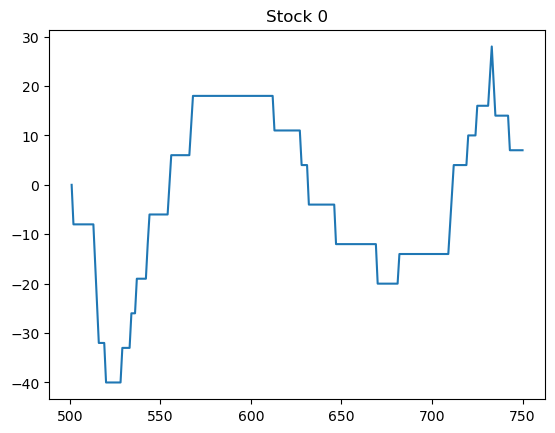

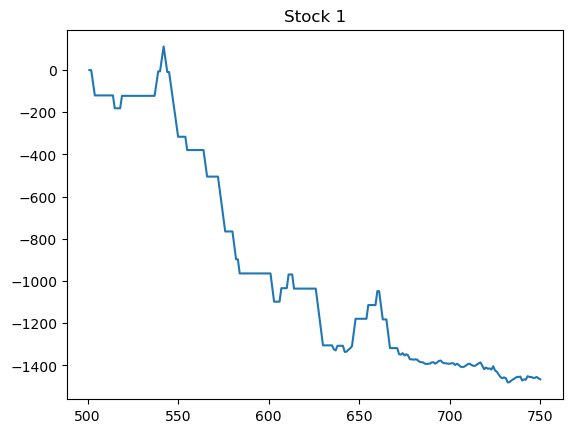

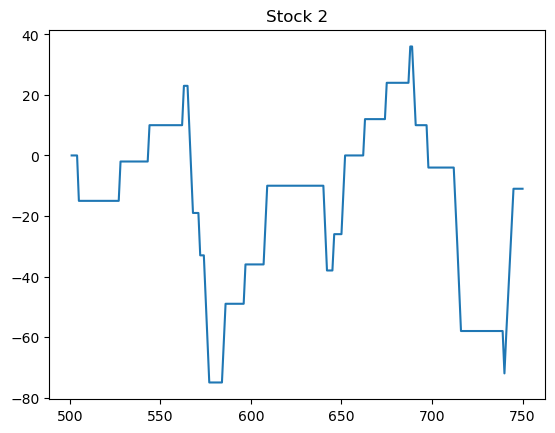

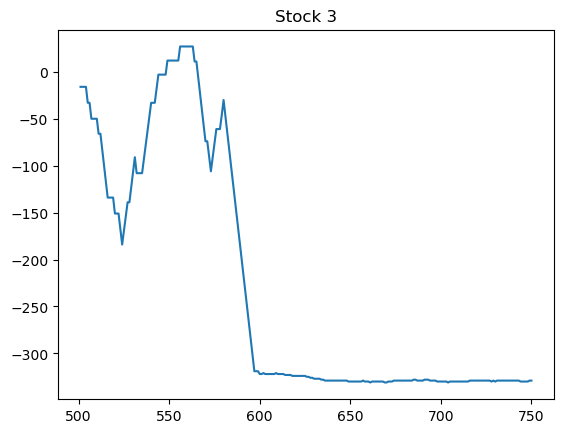

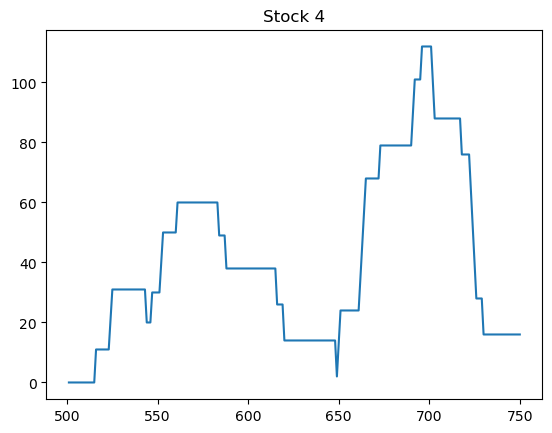

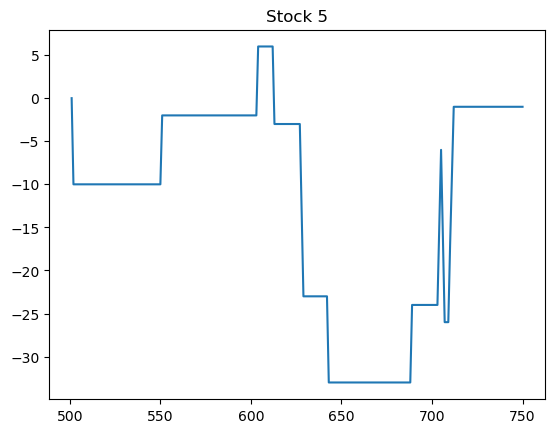

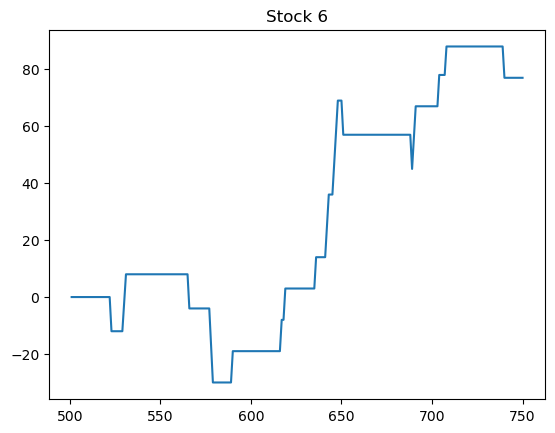

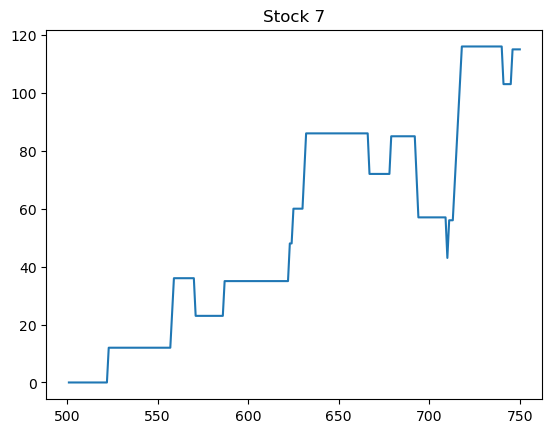

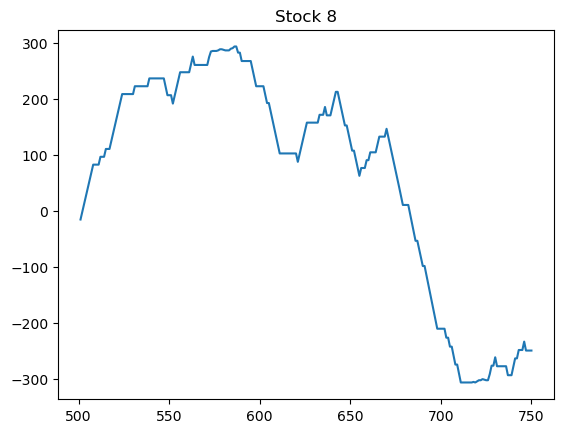

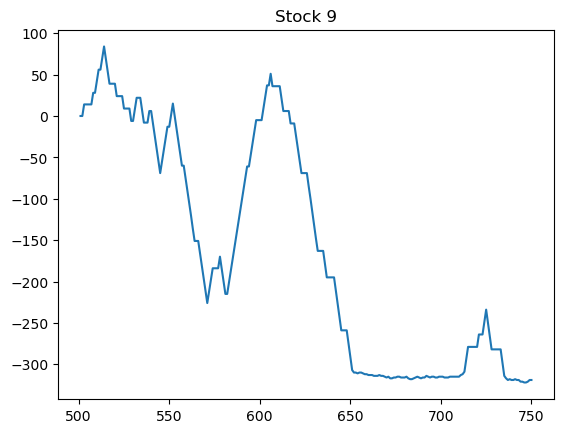

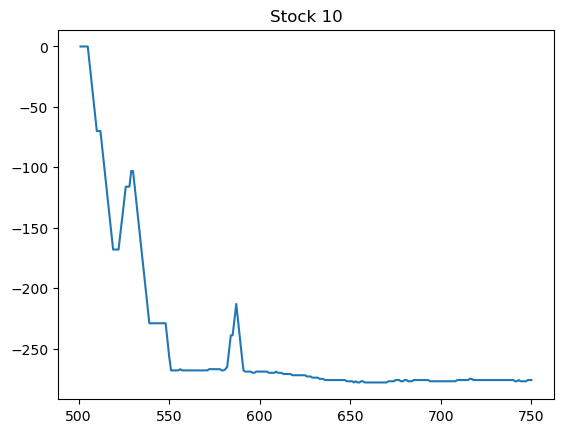

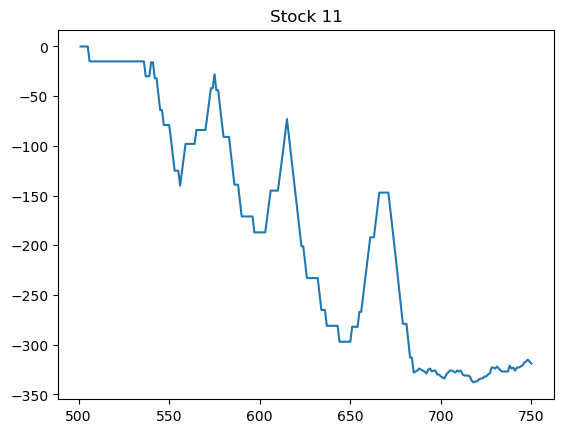

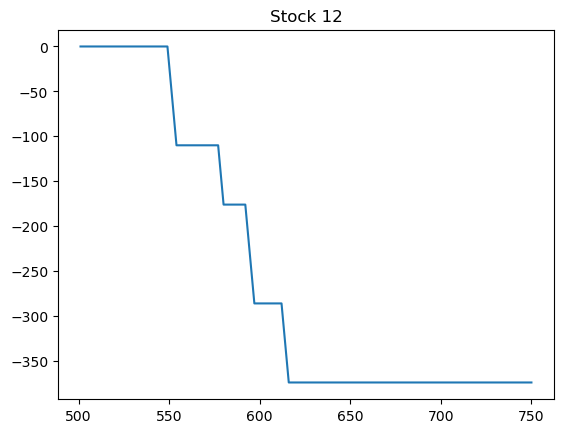

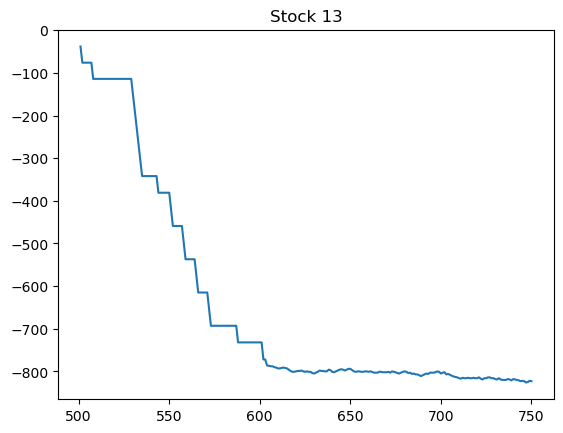

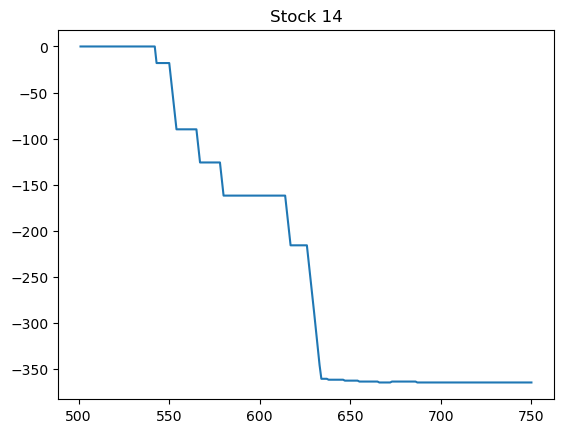

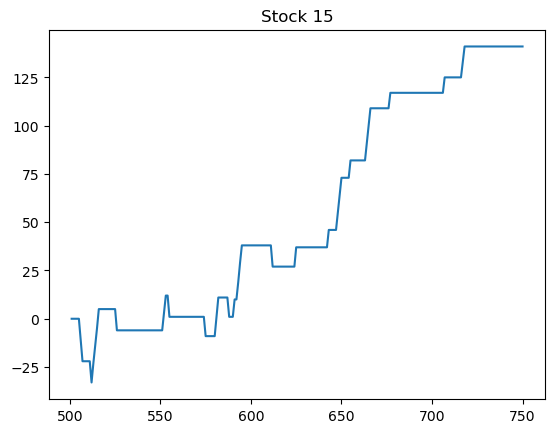

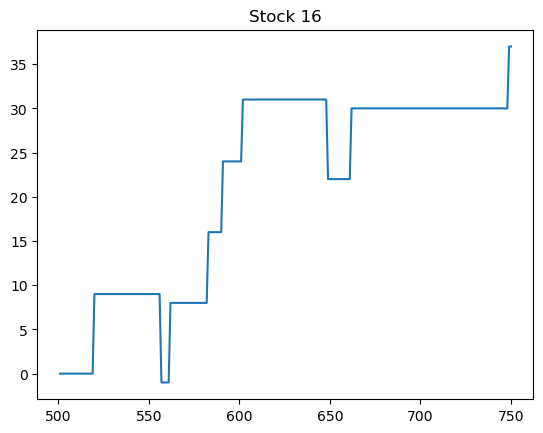

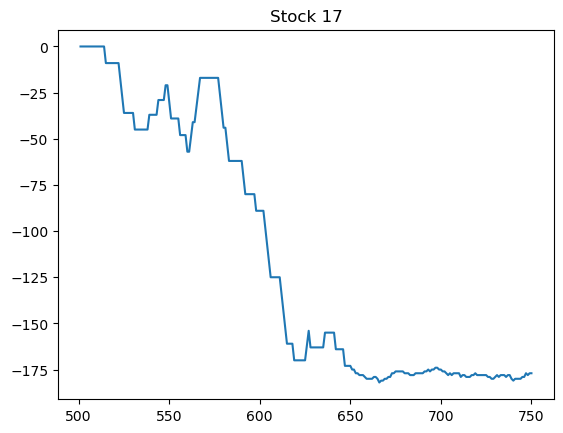

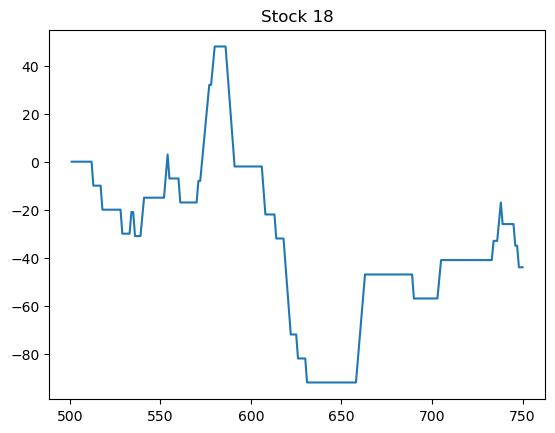

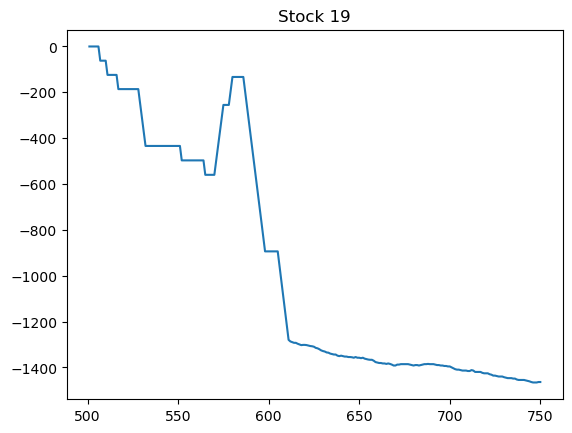

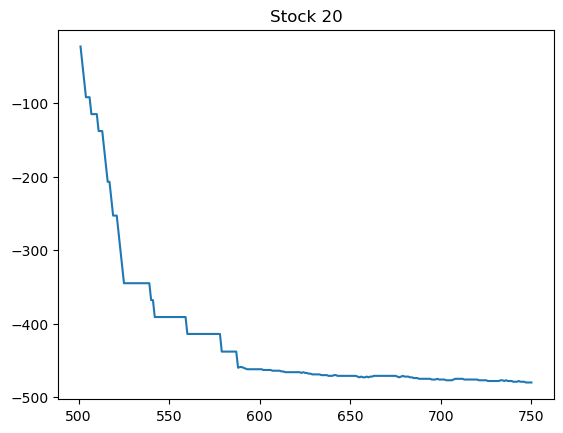

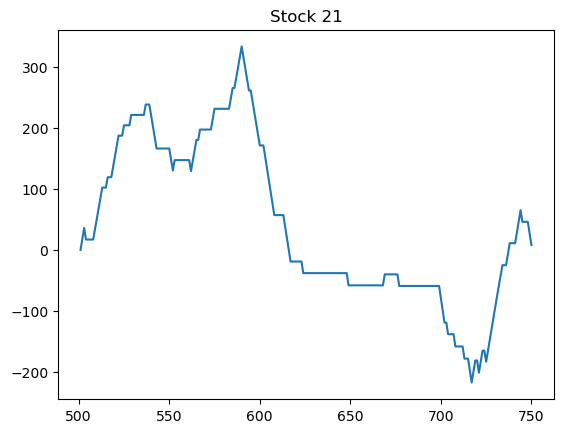

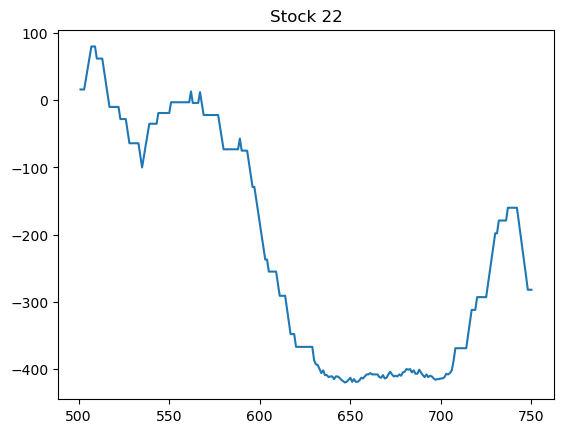

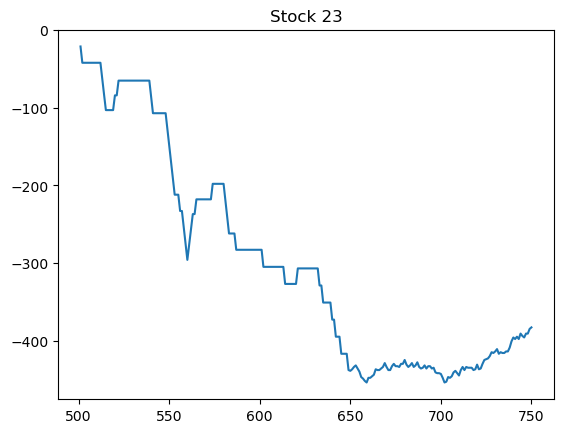

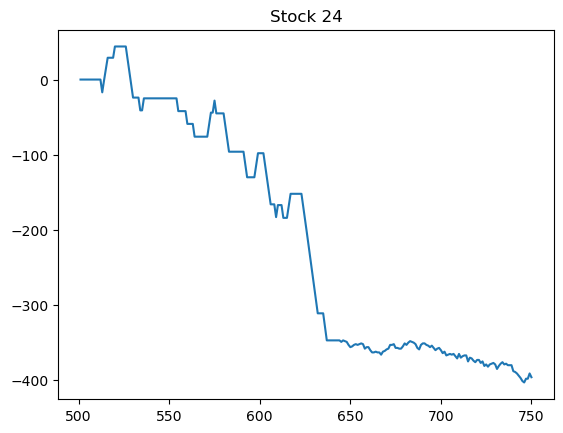

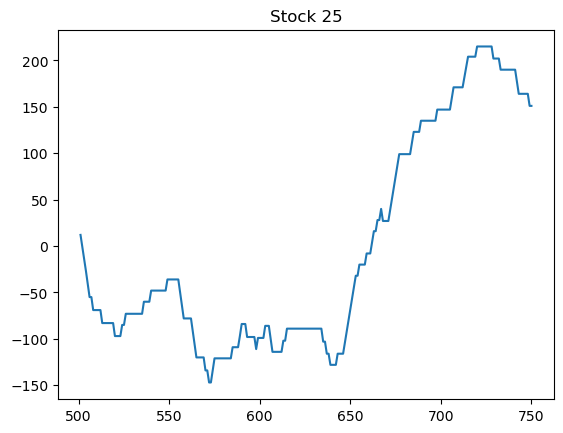

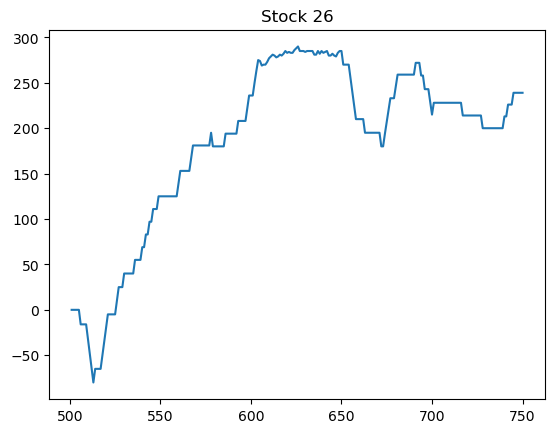

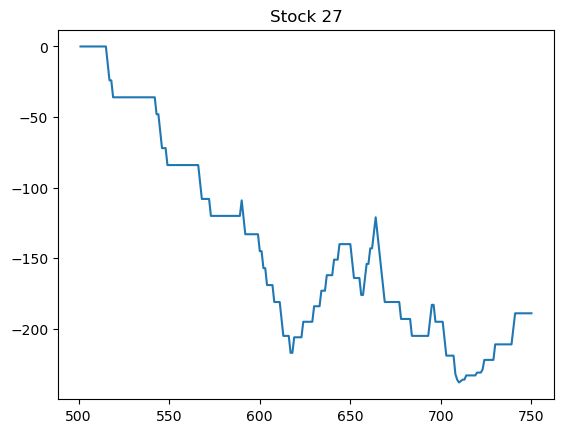

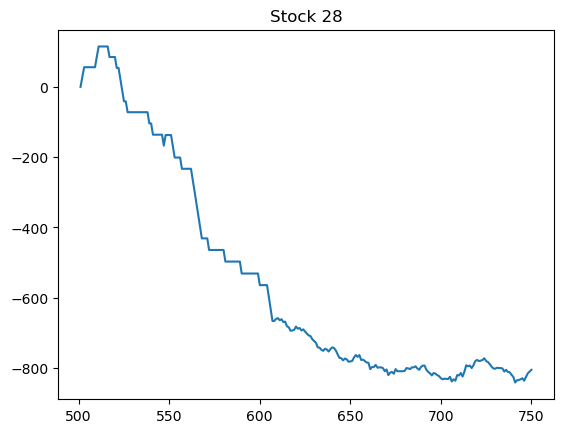

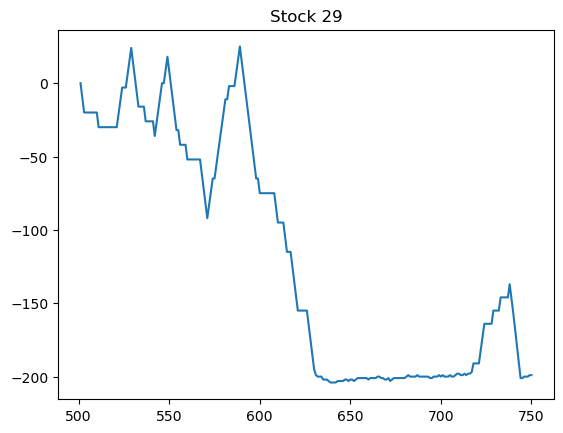

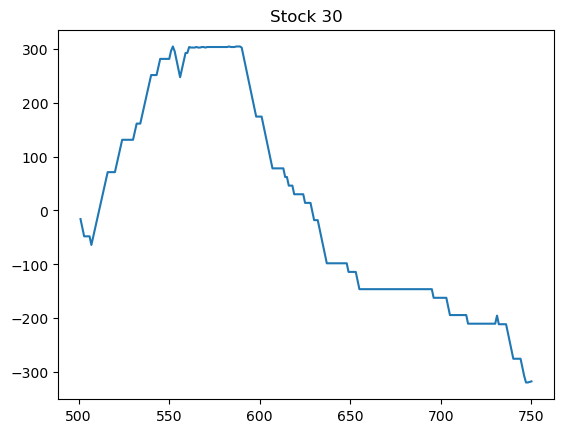

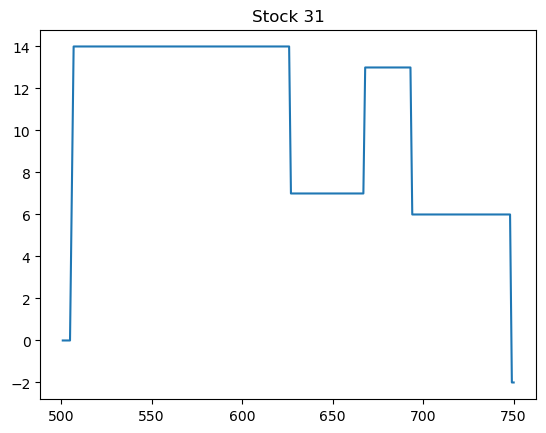

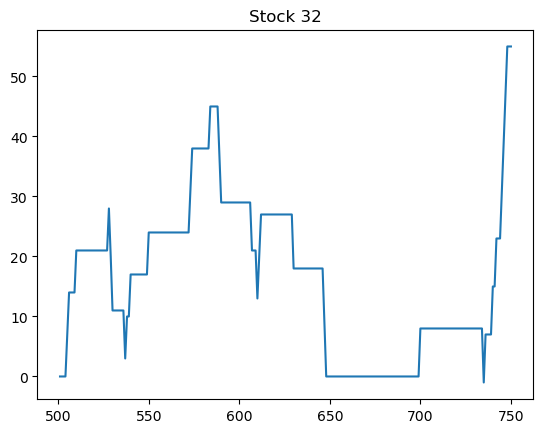

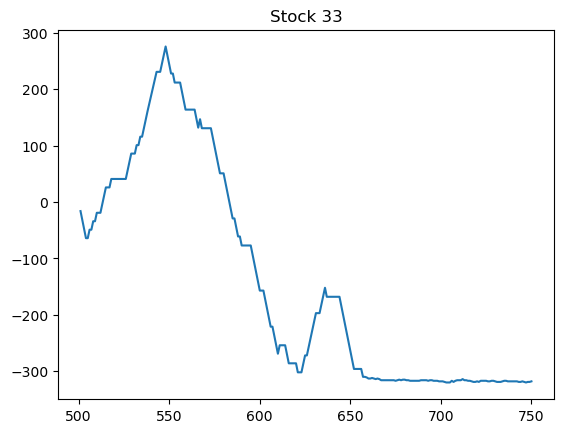

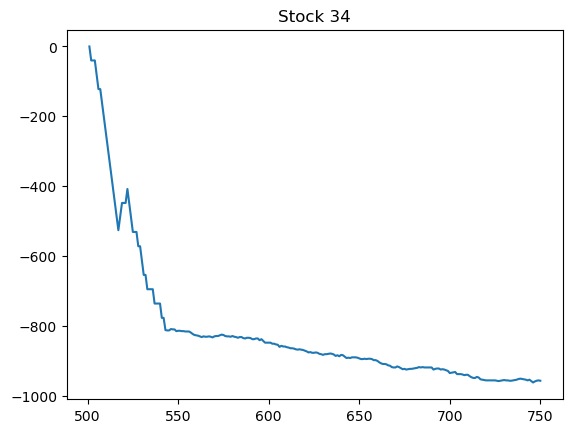

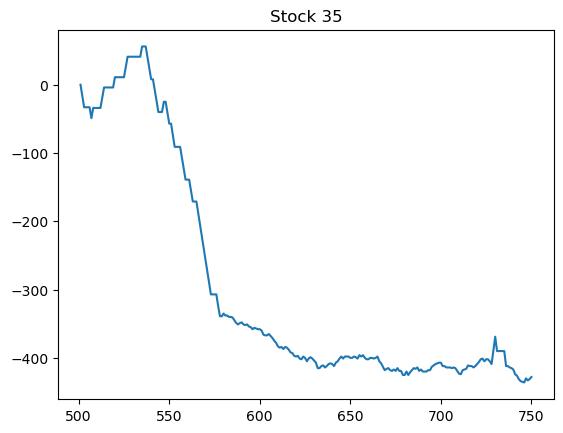

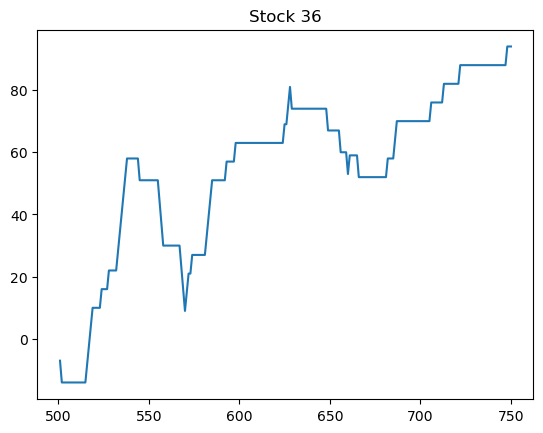

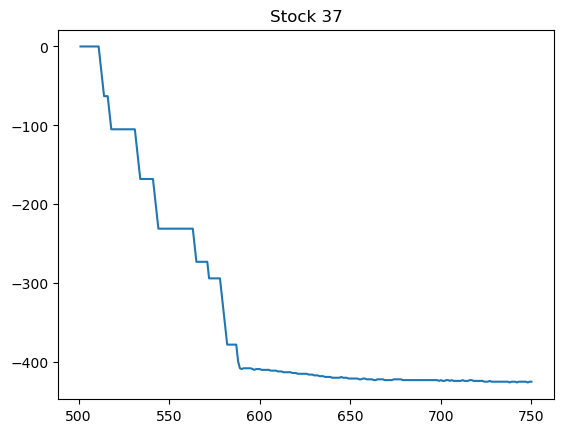

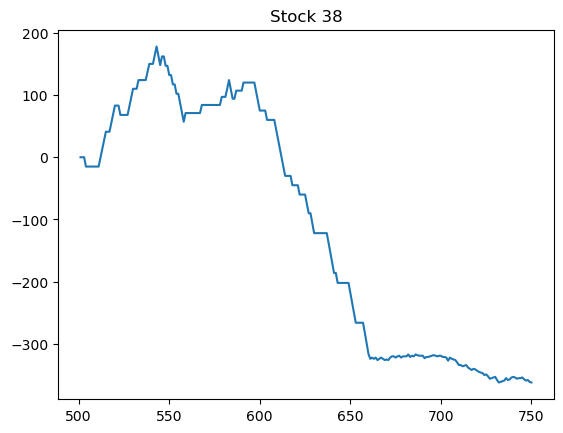

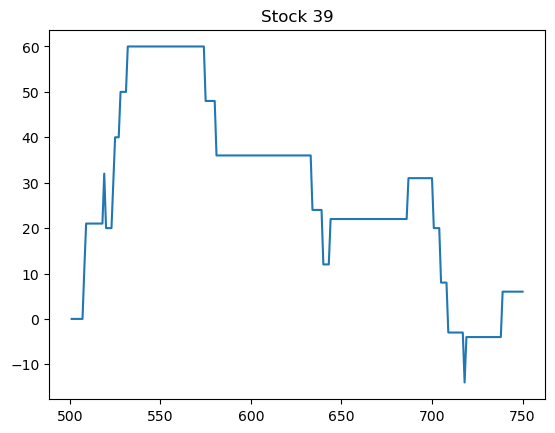

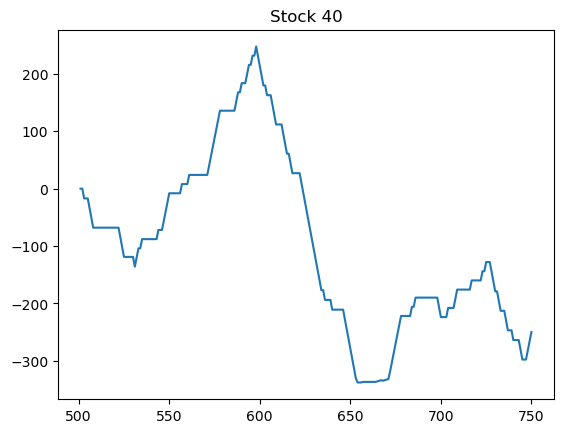

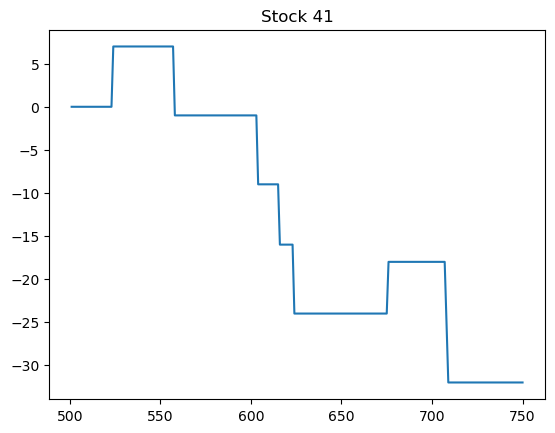

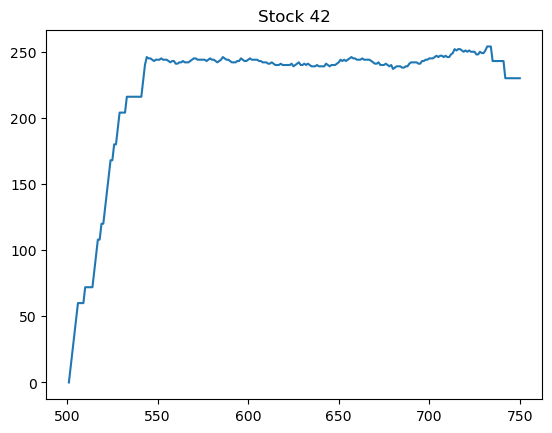

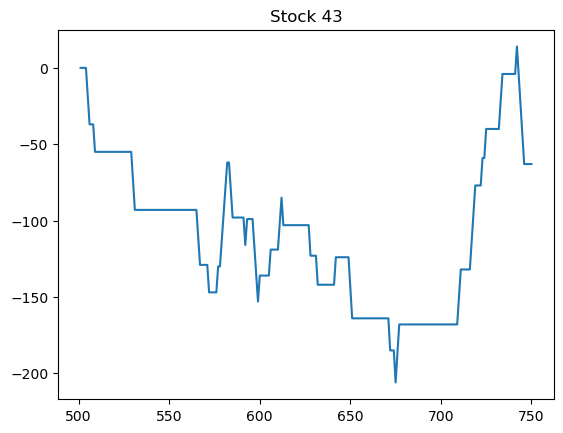

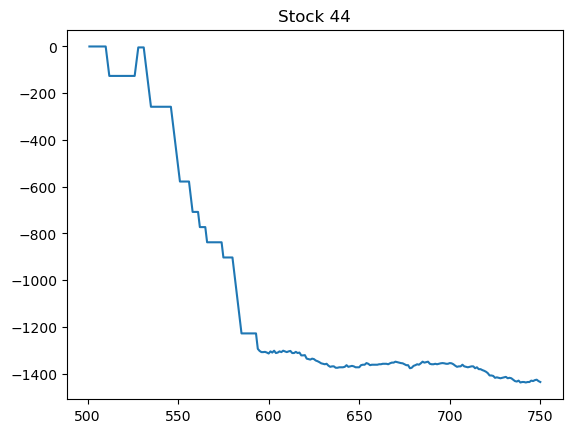

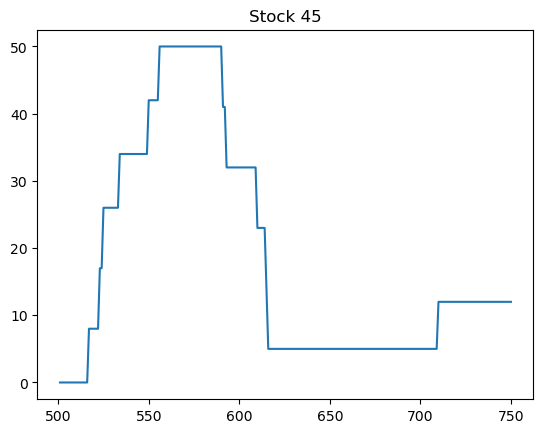

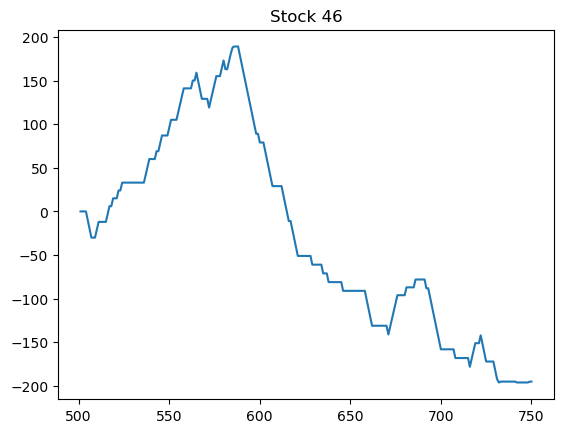

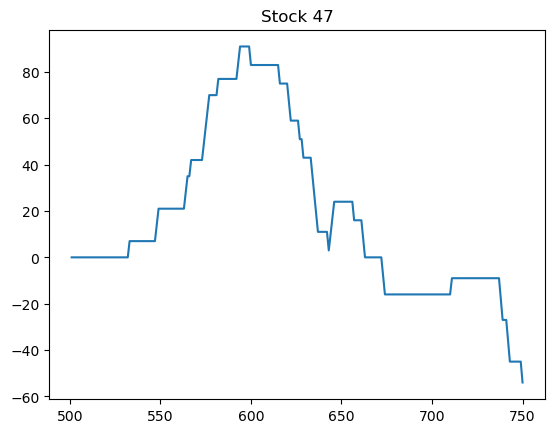

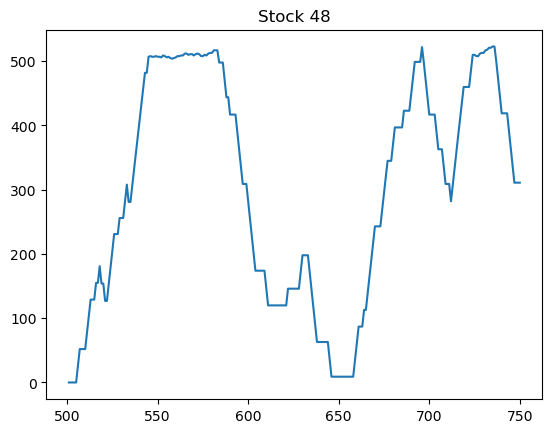

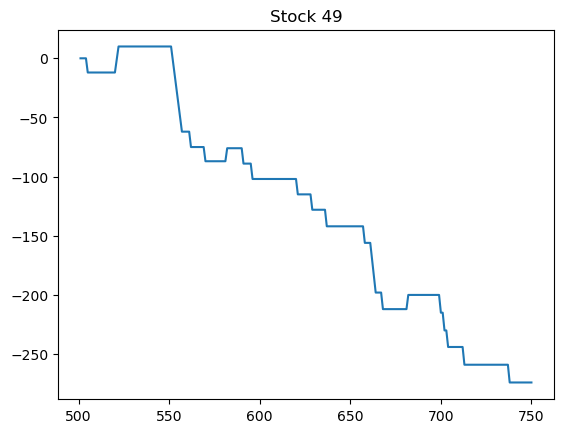

In [3]:
import matplotlib.pyplot as plt
import numpy as np

position = np.array(position)

for i in range(0, 50):
    plt.plot(range(501,751), position[:,i])
    plt.title(f"Stock {i}")
    plt.show()